In [242]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import numpy as np

# Data Prep


In [243]:
# Read in Data
data = pd.read_csv("./Econ424_F2023_PC4_training_data_small.csv")
print(data.head())

     price back_legroom  bed bed_height bed_length        body_type cabin  \
0  36990.0      40.3 in  NaN         --    67.4 in     Pickup Truck   NaN   
1   5524.0      39.6 in  NaN        NaN        NaN          Minivan   NaN   
2  39205.0      35.2 in  NaN         --    79.4 in     Pickup Truck   NaN   
3  32578.0          NaN  NaN        NaN        NaN     Pickup Truck   NaN   
4  17999.0      36.8 in  NaN        NaN        NaN  SUV / Crossover   NaN   

           city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0       Memphis               15.0                   NaN  ...             A   
1         Plano               17.0                   NaN  ...             A   
2        Monroe               15.0                   NaN  ...             A   
3          Rome                NaN                   NaN  ...             A   
4  Fayetteville               18.0                   NaN  ...             A   

  transmission_display  trimid              trim_name vehicle_

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/3697113779.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Econ424_F2023_PC4_training_data_small.csv")


In [244]:
# Find in missing values
missing = data.isna().sum()
for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])
data.shape
data.info()

price: 0
back_legroom: 10458
bed: 198723
bed_height: 171127
bed_length: 171127
body_type: 922
cabin: 195757
city: 0
city_fuel_economy: 32765
combine_fuel_economy: 200000
daysonmarket: 0
dealer_zip: 0
engine_cylinders: 6591
engine_displacement: 11357
engine_type: 6591
exterior_color: 0
fleet: 94967
frame_damaged: 94967
franchise_dealer: 0
franchise_make: 38202
front_legroom: 10458
fuel_tank_volume: 10458
fuel_type: 5383
has_accidents: 94967
height: 10458
highway_fuel_economy: 32765
horsepower: 11357
interior_color: 17
iscab: 94967
is_certified: 200000
is_cpo: 187840
is_new: 0
is_oemcpo: 191019
latitude: 0
length: 10458
listed_date: 0
listing_color: 0
longitude: 0
major_options: 13301
make_name: 0
maximum_seating: 10458
mileage: 9534
model_name: 0
owner_count: 100893
power: 32019
salvage: 94967
savings_amount: 0
seller_rating: 2651
sp_id: 4
sp_name: 0
theft_title: 94967
torque: 34330
transmission: 4212
transmission_display: 4212
trimid: 7591
trim_name: 7623
vehicle_damage_category: 20000

In [245]:
# Large Data
dataL = pd.read_csv("./Econ424_F2023_PC4_training_data_large.csv")
print(dataL.head())

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2556067753.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataL = pd.read_csv("./Econ424_F2023_PC4_training_data_large.csv")


     price back_legroom  bed bed_height bed_length        body_type cabin  \
0  36990.0      40.3 in  NaN         --    67.4 in     Pickup Truck   NaN   
1   5524.0      39.6 in  NaN        NaN        NaN          Minivan   NaN   
2  39205.0      35.2 in  NaN         --    79.4 in     Pickup Truck   NaN   
3  32578.0          NaN  NaN        NaN        NaN     Pickup Truck   NaN   
4  17999.0      36.8 in  NaN        NaN        NaN  SUV / Crossover   NaN   

           city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0       Memphis               15.0                   NaN  ...             A   
1         Plano               17.0                   NaN  ...             A   
2        Monroe               15.0                   NaN  ...             A   
3          Rome                NaN                   NaN  ...             A   
4  Fayetteville               18.0                   NaN  ...             A   

  transmission_display  trimid              trim_name vehicle_

In [246]:
# Repeat for large
missingL = dataL.isna().sum()
for x in range(len(missingL)):
    print(str(dataL.columns[x]) + ": " + str(missingL[x]))

price: 0
back_legroom: 53190
bed: 993460
bed_height: 856444
bed_length: 856444
body_type: 4648
cabin: 978713
city: 0
city_fuel_economy: 163747
combine_fuel_economy: 1000000
daysonmarket: 0
dealer_zip: 0
engine_cylinders: 33456
engine_displacement: 57655
engine_type: 33456
exterior_color: 6
fleet: 475176
frame_damaged: 475176
franchise_dealer: 0
franchise_make: 190662
front_legroom: 53190
fuel_tank_volume: 53190
fuel_type: 27409
has_accidents: 475176
height: 53190
highway_fuel_economy: 163747
horsepower: 57655
interior_color: 54
iscab: 475176
is_certified: 1000000
is_cpo: 938856
is_new: 0
is_oemcpo: 954751
latitude: 0
length: 53190
listed_date: 0
listing_color: 0
longitude: 0
major_options: 66555
make_name: 0
maximum_seating: 53190
mileage: 48233
model_name: 0
owner_count: 505129
power: 160407
salvage: 475176
savings_amount: 0
seller_rating: 13698
sp_id: 25
sp_name: 0
theft_title: 475176
torque: 172515
transmission: 21266
transmission_display: 21266
trimid: 38852
trim_name: 39006
vehicl

# Missing is_certified, vehicicle_damage_category, combine_fuel_economy for all of them





In [247]:
# useless categories
# fleet, is_cpo, is oemcpo major options, bed, bed height, bed length, cabin, iscab, transmission display, engine cylinders
data.drop(['is_certified','vehicle_damage_category', 'combine_fuel_economy','wheel_system_display','fleet','is_cpo', 'is_oemcpo','bed','bed_height','bed_length','cabin','iscab','transmission_display','engine_cylinders'], errors='ignore',
  axis='columns', inplace=True)
dataL.drop(['is_certified','vehicle_damage_category', 'combine_fuel_economy','wheel_system_display','fleet','is_cpo', 'is_oemcpo','bed','bed_height','bed_length','cabin','iscab','transmission_display','engine_cylinders'], errors='ignore',
  axis='columns', inplace=True)


In [248]:
# Remove data points under 40000
data = data[data['price'] >= 40000]
dataL = dataL[dataL['price'] >= 40000]

In [249]:
data.columns
data.shape

dataL.columns
dataL.shape

(219034, 48)

In [168]:
# Look at data
for col in data:
    print(col)
    print(data[col].unique())

price
[36990.  5524. 39205. ... 14025. 88740. 67930.]
back_legroom
['40.3 in' '39.6 in' '35.2 in' nan '36.8 in' '39.7 in' '37.4 in' '36.5 in'
 '38.3 in' '28.2 in' '39 in' '36.7 in' '31.2 in' '37 in' '34.8 in'
 '35.7 in' '35.1 in' '39.3 in' '40.4 in' '38.5 in' '35.3 in' '33.2 in'
 '39.1 in' '37.9 in' '41.5 in' '--' '37.1 in' '40.1 in' '39.5 in'
 '40.9 in' '36.1 in' '43.4 in' '42.3 in' '34.3 in' '35.8 in' '38.8 in'
 '34.2 in' '45.2 in' '37.6 in' '38.9 in' '38.1 in' '43.5 in' '35 in'
 '39.9 in' '38.4 in' '40.7 in' '38.6 in' '36.3 in' '43.6 in' '34.6 in'
 '38 in' '44.3 in' '33.1 in' '37.2 in' '41 in' '40.5 in' '35.6 in'
 '39.4 in' '33.6 in' '38.2 in' '41.7 in' '34.4 in' '38.7 in' '37.3 in'
 '41.4 in' '40.2 in' '36.2 in' '40.6 in' '32.4 in' '42.4 in' '37.7 in'
 '30.1 in' '32.5 in' '42 in' '34.1 in' '31 in' '36 in' '32.2 in' '33.5 in'
 '34.7 in' '33.4 in' '37.8 in' '31.7 in' '33 in' '29.9 in' '39.8 in'
 '32.6 in' '37.5 in' '33.7 in' '29 in' '34 in' '43.1 in' '32.9 in'
 '35.4 in' '27.3 in' '3

In [250]:
# Preprocess data to valid format

floatCols = ["back_legroom", "front_legroom", "height", "length", "wheelbase", "width", "fuel_tank_volume"]
intCols = ["maximum_seating"]
for col in floatCols:
    # Preprocess columns in small set
    data[col] = data[col].str.split(' ').str[0]
    data[col].replace('--', np.nan , inplace=True)
    data[col] = pd.to_numeric(data[col],downcast='float')
    
    # Preprocess columns in large set
    dataL[col] = dataL[col].str.split(' ').str[0]
    dataL[col].replace('--', np.nan , inplace=True)
    dataL[col] = pd.to_numeric(dataL[col],downcast='float')

for col in intCols:
    data[col] = data[col].str.split(' ').str[0]
    data[col].replace('--', np.nan , inplace=True)
    data[col] = pd.to_numeric(data[col],downcast='integer')
    data[col].replace(np.nan, 5, inplace=True)
    
    dataL[col] = dataL[col].str.split(' ').str[0]
    dataL[col].replace('--', np.nan , inplace=True)
    dataL[col] = pd.to_numeric(dataL[col],downcast='integer')
    dataL[col].replace(np.nan, 5, inplace=True)

In [149]:
for col in data.columns:
    print(col + ": " + str(data[col].unique()))

price: [56542. 48046. 92612. ... 52529. 88740. 67930.]
back_legroom: [39.7  nan 37.  41.5 39.  40.1 38.3 39.5 43.4 35.8 38.8 45.2 40.9 38.1
 44.3 39.6 37.6 43.6 41.7 41.  40.2 40.3 42.4 30.1 32.5 42.  38.4 34.1
 38.  42.3 35.2 38.5 37.3 36.8 37.4 37.9 38.6 38.7 32.6 36.1 35.7 29.9
 43.1 33.7 40.6 31.9 36.5 30.3 34.7 35.  30.9 36.4 33.8 39.1 37.2 32.9
 38.9 39.2 36.7 32.2 41.3 33.5 36.6 37.1 32.  33.  34.6 47.5 35.1 34.2
 40.4 29.5 29.  34.4 37.8 42.6 40.  34.5 33.1 41.1 33.4 39.3 36.9 42.1
 43.  39.4 37.5 33.2 44.4 35.5 33.9 36.2 28.9 41.9 29.2 32.7 35.6 27.3
 40.7 43.5 42.9 47.4 30.6 32.4 44.5 43.3 31.7 31.4 41.8 27.1 30.4 35.4
 33.3 26.4 34.8 39.9 29.3 31.8 30.5 42.2 46.8 24.8 43.7 35.9 35.3 31.
 28.2 30.2 29.8 32.8 38.2 39.8 24.6 36.3 28.6 45.9 30.8 27.6 28.5 14.
 44.1 34.3 31.6]
body_type: ['SUV / Crossover' 'Pickup Truck' 'Sedan' 'Minivan' 'Coupe' 'Convertible'
 'Van' 'Wagon' nan 'Hatchback']
city: ['Springdale' 'Calais' 'Livermore' ... 'Lompoc' 'Marathon' 'Palm Desert']
city_fuel

In [251]:
# Replace all with mean and mode
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']

for col in data.columns:
    if col in categorical_columns or col in bool_columns:
        # Replace "--" with NaN
        data[col] = data[col].replace(np.nan, "--")
        data[col] = data[col].replace("--", pd.NA)
        # Calculate the mode of the valid string values
        mode_value = data[col].mode(dropna=True).iloc[0]

        # Replace NaN with the mode
        data[col].fillna(mode_value,inplace=True)
        
    elif col != "listed_date":
        # calculate mean
        # Convert non-numeric values ("--") to NaN
        data[col] = pd.to_numeric(data[col], errors="coerce")

        # Calculate the mean of the valid numeric values
        mean_value = data[col].dropna().mean()

        # Replace NaN and "--" with the mean
        data[col].fillna(mean_value, inplace=True)
    
        
# Mean: back_legroom, city_fuel_economy, engine_displacement, front_legroom, fuel_tank_volume, height,
# highway_fuel_economy,  mileage, wheelbase, width

# Mode: maximum seating, owner count, seller rating, trimid

# Repeat for large dataset
for col in dataL.columns:
    if col in categorical_columns or col in bool_columns:
        # Replace "--" with NaN
        dataL[col] = dataL[col].replace(np.nan, "--")
        dataL[col] = dataL[col].replace("--", pd.NA)
        # Calculate the mode of the valid string values
        mode_value = dataL[col].mode(dropna=True).iloc[0]

        # Replace NaN with the mode
        dataL[col].fillna(mode_value,inplace=True)
        
    elif col != "listed_date":
        # calculate mean
        # Convert non-numeric values ("--") to NaN
        dataL[col] = pd.to_numeric(dataL[col], errors="coerce")

        # Calculate the mean of the valid numeric values
        mean_value = dataL[col].dropna().mean()

        # Replace NaN and "--" with the mean
        dataL[col].fillna(mean_value, inplace=True)

In [254]:
for col in data.columns:
    print(col + ": " + str(data[col].unique()))
    
for col in dataL.columns:
    print(col + ": " + str(dataL[col].unique()))

price: [56542. 48046. 92612. ... 52529. 88740. 67930.]
back_legroom: [39.7     39.84926 37.      41.5     39.      40.1     38.3     39.5
 43.4     35.8     38.8     45.2     40.9     38.1     44.3     39.6
 37.6     43.6     41.7     41.      40.2     40.3     42.4     30.1
 32.5     42.      38.4     34.1     38.      42.3     35.2     38.5
 37.3     36.8     37.4     37.9     38.6     38.7     32.6     36.1
 35.7     29.9     43.1     33.7     40.6     31.9     36.5     30.3
 34.7     35.      30.9     36.4     33.8     39.1     37.2     32.9
 38.9     39.2     36.7     32.2     41.3     33.5     36.6     37.1
 32.      33.      34.6     47.5     35.1     34.2     40.4     29.5
 29.      34.4     37.8     42.6     40.      34.5     33.1     41.1
 33.4     39.3     36.9     42.1     43.      39.4     37.5     33.2
 44.4     35.5     33.9     36.2     28.9     41.9     29.2     32.7
 35.6     27.3     40.7     43.5     42.9     47.4     30.6     32.4
 44.5     43.3     31.7     31.4  

In [172]:
# Confirm that data is now valid
missing = data.isna().sum()
for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])
data.shape
data.info()
print(data['listed_date'])
print(data['year'])

price: 0
back_legroom: 0
body_type: 0
city: 0
city_fuel_economy: 0
daysonmarket: 0
dealer_zip: 0
engine_displacement: 0
engine_type: 0
exterior_color: 0
frame_damaged: 0
franchise_dealer: 0
franchise_make: 0
front_legroom: 0
fuel_tank_volume: 0
fuel_type: 0
has_accidents: 0
height: 0
highway_fuel_economy: 0
horsepower: 0
interior_color: 0
is_new: 0
latitude: 0
length: 0
listed_date: 0
listing_color: 0
longitude: 0
major_options: 0
make_name: 0
maximum_seating: 0
mileage: 0
model_name: 0
owner_count: 0
power: 0
salvage: 0
savings_amount: 0
seller_rating: 0
sp_id: 0
sp_name: 0
theft_title: 0
torque: 0
transmission: 0
trimid: 0
trim_name: 0
wheel_system: 0
wheelbase: 0
width: 0
year: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 200000 non-null  float64
 1   back_legroom          200000 non-nul

In [255]:
# Update the csv files to not have to preprocess data each time
# Updated csv file
csv_file = "./updatedSmall.csv"


# Use numpy.savetxt to save the array as a CSV file
data.to_csv(csv_file,index=False, encoding="utf-8", float_format="%1.6f")

# Updated csv file
csv_fileL = "./updatedLarge.csv"


# Use numpy.savetxt to save the array as a CSV file
dataL.to_csv(csv_fileL,index=False, encoding="utf-8", float_format="%1.6f")

## Apply Label Encoder and Standard Scaler

In [256]:
data = pd.read_csv("./updatedSmall.csv")
dataL = pd.read_csv("./updatedLarge.csv")

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2367077306.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./updatedSmall.csv")
/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2367077306.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataL = pd.read_csv("./updatedLarge.csv")


In [257]:
# setup categorical variables
# label encoder to encode the different categorical features
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']


label_encoder = LabelEncoder()
for category in categorical_columns:
    print("Doing it for category: " + category)

    data[category] = data[category].astype(str)
    print(all)

    data[category] = label_encoder.fit_transform(data[category])
    
    # Do same for large data set
    dataL[category] = dataL[category].astype(str)
    print(all)

    dataL[category] = label_encoder.fit_transform(dataL[category])
    

for category in bool_columns:
    print("Doing it for category: " + category)

    data[category] = data[category].astype(str)
    print(all)

    data[category] = label_encoder.fit_transform(data[category])

    # Do same for large dataset
    dataL[category] = dataL[category].astype(str)
    print(all)

    dataL[category] = label_encoder.fit_transform(dataL[category])


Doing it for category: trimid
<built-in function all>
<built-in function all>
Doing it for category: body_type
<built-in function all>
<built-in function all>
Doing it for category: city
<built-in function all>
<built-in function all>
Doing it for category: dealer_zip
<built-in function all>
<built-in function all>
Doing it for category: engine_type
<built-in function all>
<built-in function all>
Doing it for category: exterior_color
<built-in function all>
<built-in function all>
Doing it for category: franchise_make
<built-in function all>
<built-in function all>
Doing it for category: fuel_type
<built-in function all>
<built-in function all>
Doing it for category: horsepower
<built-in function all>
<built-in function all>
Doing it for category: interior_color
<built-in function all>
<built-in function all>
Doing it for category: listing_color
<built-in function all>
<built-in function all>
Doing it for category: major_options
<built-in function all>
<built-in function all>
Doing it 

In [259]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43706 entries, 0 to 43705
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 43706 non-null  float64
 1   back_legroom          43706 non-null  float64
 2   body_type             43706 non-null  int64  
 3   city                  43706 non-null  int64  
 4   city_fuel_economy     43706 non-null  float64
 5   daysonmarket          43706 non-null  int64  
 6   dealer_zip            43706 non-null  int64  
 7   engine_displacement   43706 non-null  float64
 8   engine_type           43706 non-null  int64  
 9   exterior_color        43706 non-null  int64  
 10  frame_damaged         43706 non-null  int64  
 11  franchise_dealer      43706 non-null  int64  
 12  franchise_make        43706 non-null  int64  
 13  front_legroom         43706 non-null  float64
 14  fuel_tank_volume      43706 non-null  float64
 15  fuel_type          

In [260]:
dataL.head()
dataL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219034 entries, 0 to 219033
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 219034 non-null  float64
 1   back_legroom          219034 non-null  float64
 2   body_type             219034 non-null  int64  
 3   city                  219034 non-null  int64  
 4   city_fuel_economy     219034 non-null  float64
 5   daysonmarket          219034 non-null  int64  
 6   dealer_zip            219034 non-null  int64  
 7   engine_displacement   219034 non-null  float64
 8   engine_type           219034 non-null  int64  
 9   exterior_color        219034 non-null  int64  
 10  frame_damaged         219034 non-null  int64  
 11  franchise_dealer      219034 non-null  int64  
 12  franchise_make        219034 non-null  int64  
 13  front_legroom         219034 non-null  float64
 14  fuel_tank_volume      219034 non-null  float64
 15  

In [261]:
missing = data.isna().sum()

for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])
    
missingL = dataL.isna().sum()

for x in range(len(missing)):
    print(str(dataL.columns[x]) + ": " + str(missing[x]))

price: 0
back_legroom: 0
body_type: 0
city: 0
city_fuel_economy: 0
daysonmarket: 0
dealer_zip: 0
engine_displacement: 0
engine_type: 0
exterior_color: 0
frame_damaged: 0
franchise_dealer: 0
franchise_make: 0
front_legroom: 0
fuel_tank_volume: 0
fuel_type: 0
has_accidents: 0
height: 0
highway_fuel_economy: 0
horsepower: 0
interior_color: 0
is_new: 0
latitude: 0
length: 0
listed_date: 0
listing_color: 0
longitude: 0
major_options: 0
make_name: 0
maximum_seating: 0
mileage: 0
model_name: 0
owner_count: 0
power: 0
salvage: 0
savings_amount: 0
seller_rating: 0
sp_id: 0
sp_name: 0
theft_title: 0
torque: 0
transmission: 0
trimid: 0
trim_name: 0
wheel_system: 0
wheelbase: 0
width: 0
year: 0
price: 0
back_legroom: 0
body_type: 0
city: 0
city_fuel_economy: 0
daysonmarket: 0
dealer_zip: 0
engine_displacement: 0
engine_type: 0
exterior_color: 0
frame_damaged: 0
franchise_dealer: 0
franchise_make: 0
front_legroom: 0
fuel_tank_volume: 0
fuel_type: 0
has_accidents: 0
height: 0
highway_fuel_economy: 0

In [262]:
data['target'] = np.log(data['price'])
dataL['target'] = np.log(dataL['price'])


In [263]:
print(data['target'])

0        10.942739
1        10.779914
2        11.436174
3        10.809728
4        10.791029
           ...    
43701    10.785477
43702    10.687366
43703    10.621303
43704    11.126233
43705    10.975414
Name: target, Length: 43706, dtype: float64


# Create Different Models


In [264]:
# Imports
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset 
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table 
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR,  plot_tree, export_text)
from sklearn.metrics import (accuracy_score , log_loss) 
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)

from matplotlib.pyplot import subplots 
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split 
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


from sklearn.preprocessing import LabelEncoder

In [265]:
# Set up Data
Y = data['target']
X = data.drop(columns=['price','target','listed_date'])

YL = dataL['target']
XL = dataL.drop(columns=['price','target','listed_date'])

In [266]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, YL, test_size=0.3, random_state=42)

## Bagging

In [267]:
bag = RF(max_features=X_train.shape[1],random_state=0)
bag.fit(X_train,y_train)

bagL = RF(max_features=X_trainL.shape[1],random_state=0)
bagL.fit(X_trainL,y_trainL)

RandomForestRegressor(max_features=46, random_state=0)

Mean Squared Error: 0.00713444098741388
R^2: 0.8712156222418661
Mean Squared Error: 0.004437553971234708
R^2: 0.9200031130716825


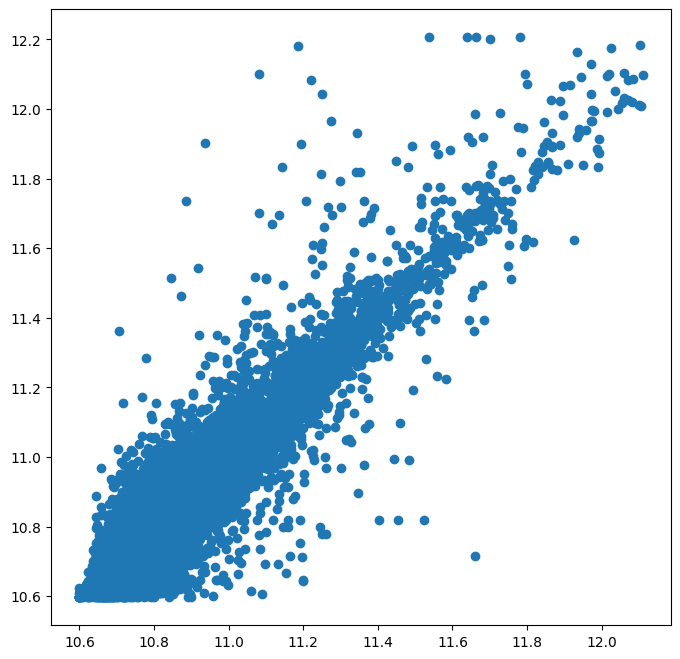

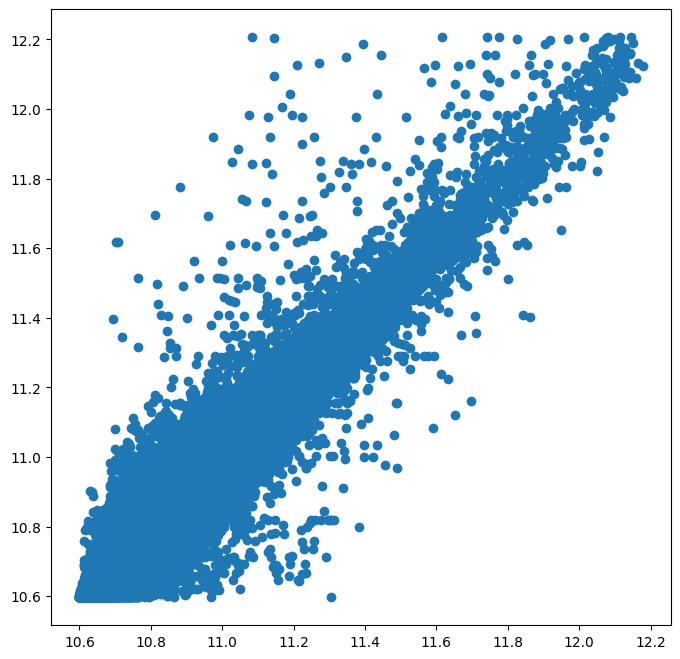

In [269]:
ax = subplots(figsize=(8,8))[1] 
y_hat_bag = bag.predict(X_test) 
ax.scatter(y_hat_bag, y_test) 

# calculate mse
mse = mean_squared_error(y_test, y_hat_bag)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_hat_bag)
print(f'R^2: {r2}')



# Repeat for Large
axL = subplots(figsize=(8,8))[1] 
y_hat_bagL = bagL.predict(X_testL) 
axL.scatter(y_hat_bagL, y_testL) 

# calculate mse
mse = mean_squared_error(y_testL, y_hat_bagL)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_testL, y_hat_bagL)
print(f'R^2: {r2}')

In [271]:
feature_imp = pd.DataFrame( {'importance':bag.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
horsepower,0.232528
mileage,0.068731
trim_name,0.065294
engine_displacement,0.059302
model_name,0.053309
trimid,0.052503
wheelbase,0.049459
power,0.041369
make_name,0.035356
torque,0.033599


In [272]:
feature_impL = pd.DataFrame( {'importance':bagL.feature_importances_}, index=XL.columns)
feature_impL.sort_values(by='importance', ascending=False)

,importance
horsepower,0.194480
engine_displacement,0.074002
trimid,0.069074
mileage,0.068565
power,0.067351
trim_name,0.062089
model_name,0.056324
torque,0.048713
make_name,0.037145
maximum_seating,0.026914


In [273]:
data_bag = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(X_train, y_train) 
y_hat_bag_500 = data_bag.predict(X_test)


data_bagL = RF(max_features=X_trainL.shape[1], n_estimators=500, random_state=0).fit(X_trainL, y_trainL) 
y_hat_bag_500L = data_bagL.predict(X_testL)


Mean Squared Error: 0.007075490782045853
R^2: 0.8722797372202405
Mean Squared Error: 0.004400654824710213
R^2: 0.9206683031451792


In [274]:
mse = mean_squared_error(y_test, y_hat_bag_500)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_hat_bag_500)
print(f'R^2: {r2}')

mse = mean_squared_error(y_testL, y_hat_bag_500L)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_testL, y_hat_bag_500L)
print(f'R^2: {r2}')

Mean Squared Error: 0.007075490782045853
R^2: 0.8722797372202405
Mean Squared Error: 0.004400654824710213
R^2: 0.9206683031451792


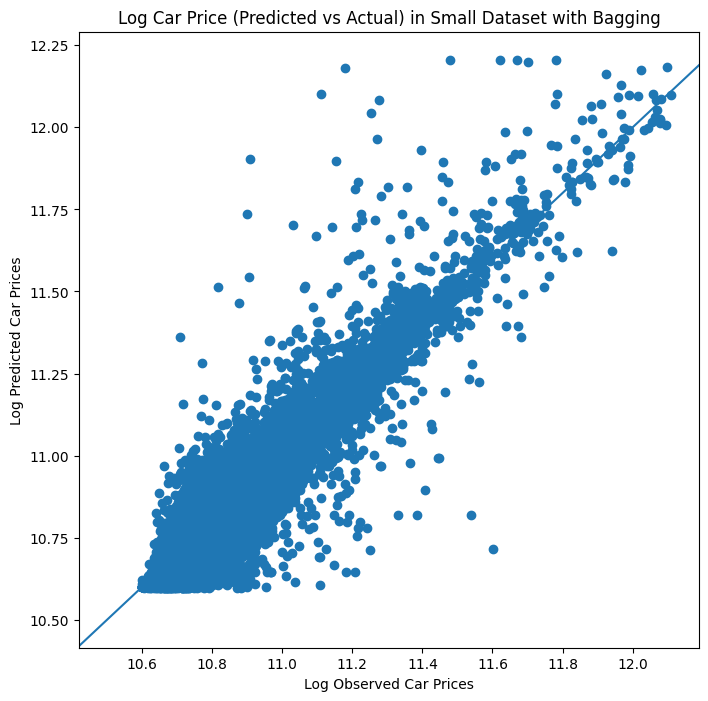

In [275]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(y_hat_bag_500, y_test) 
ax.title.set_text('Log Car Price (Predicted vs Actual) in Small Dataset with Bagging')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")
ax.axline((10.5,10.5), slope=1)

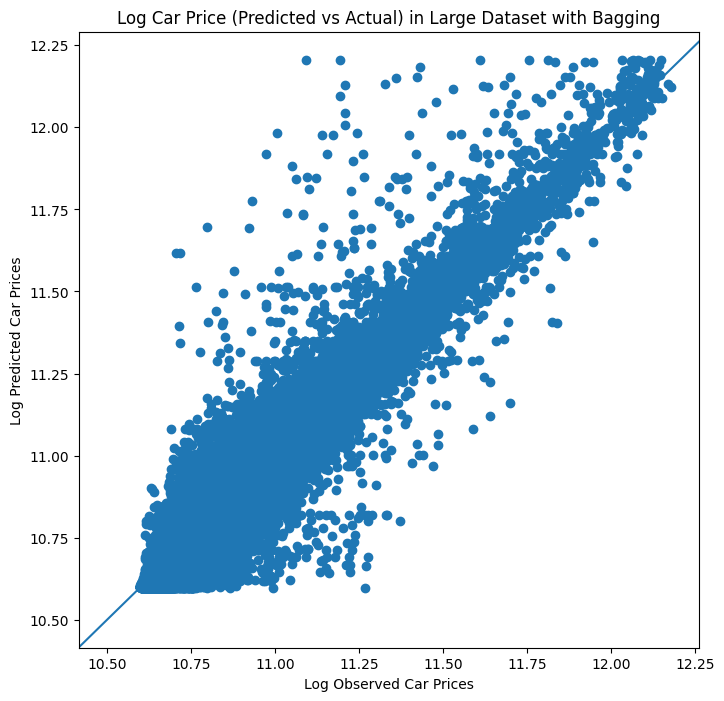

In [276]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(y_hat_bag_500L, y_testL) 
ax.title.set_text('Log Car Price (Predicted vs Actual) in Large Dataset with Bagging')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")
ax.axline((10.5,10.5), slope=1)

In [277]:
feature_imp = pd.DataFrame( {'importance':data_bag.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
horsepower,0.240961
mileage,0.070102
trim_name,0.066499
engine_displacement,0.057966
model_name,0.052698
trimid,0.051271
wheelbase,0.048966
torque,0.036659
make_name,0.036297
power,0.031004


In [278]:
feature_imp = pd.DataFrame( {'importance':data_bagL.feature_importances_}, index=XL.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
horsepower,0.199246
engine_displacement,0.074087
mileage,0.068571
trimid,0.068353
trim_name,0.062395
power,0.060169
model_name,0.058143
torque,0.051116
make_name,0.038581
maximum_seating,0.025518


## Random Forests

In [279]:
rf = RF(max_features=int(np.sqrt(X_train.shape[1])),random_state=0)
rf.fit(X_train,y_train)



RandomForestRegressor(max_features=6, random_state=0)

In [289]:
rfL = RF(max_features=int(np.sqrt(X_trainL.shape[1])),random_state=0)
rfL.fit(X_trainL,y_trainL)

RandomForestRegressor(max_features=6, random_state=0)

Text(0, 0.5, 'Log Predicted Car Prices')

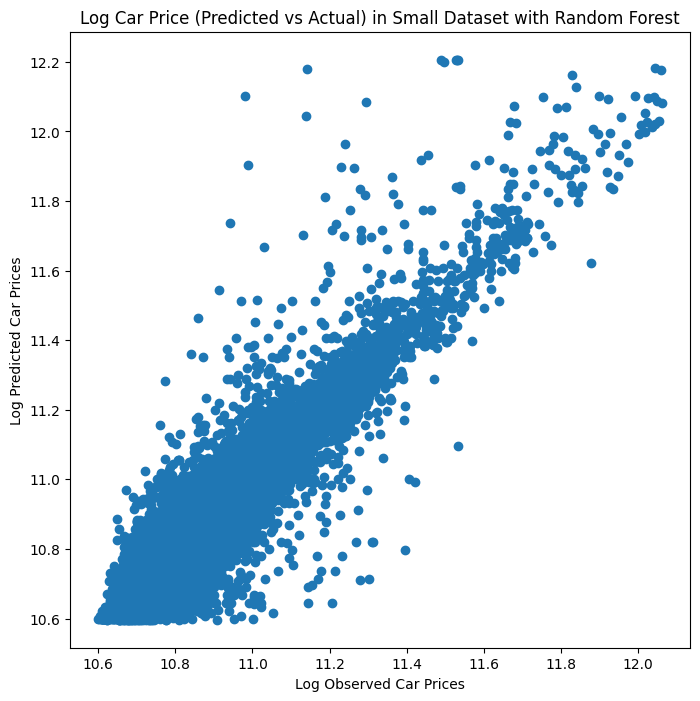

In [280]:
ax = subplots(figsize=(8,8))[1] 
y_hat_rf = rf.predict(X_test) 
ax.scatter(y_hat_rf, y_test) 
np.mean((y_test - y_hat_rf)**2)
ax.title.set_text('Log Car Price (Predicted vs Actual) in Small Dataset with Random Forest')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

Text(0, 0.5, 'Log Predicted Car Prices')

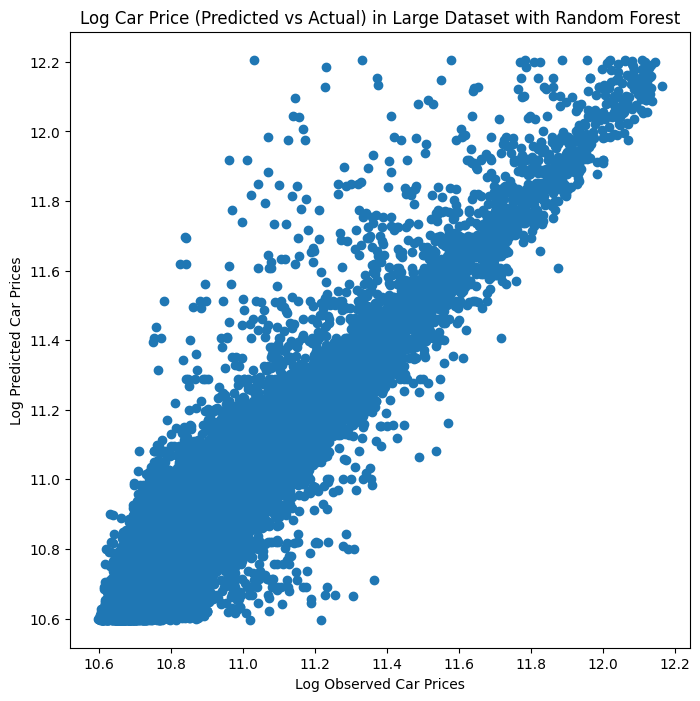

In [290]:
ax = subplots(figsize=(8,8))[1] 
y_hat_rfL = rfL.predict(X_testL) 
ax.scatter(y_hat_rfL, y_testL) 
np.mean((y_testL - y_hat_rfL)**2)
ax.title.set_text('Log Car Price (Predicted vs Actual) in Large Dataset with Random Forest')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

In [281]:
mse = mean_squared_error(y_test, y_hat_rf)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_hat_rf)
print(f'R^2: {r2}')


Mean Squared Error: 0.007428037191986784
R^2: 0.8659158931411876


In [291]:

mse = mean_squared_error(y_testL, y_hat_rfL)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_testL, y_hat_rfL)
print(f'R^2: {r2}')

Mean Squared Error: 0.0047614859403818195
R^2: 0.9141635110575308


In [282]:
feature_imp = pd.DataFrame( {'importance':rf.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
horsepower,0.093549
power,0.080132
torque,0.067894
height,0.043393
trimid,0.043045
trim_name,0.041387
fuel_tank_volume,0.035481
model_name,0.034040
mileage,0.032542
make_name,0.032317


In [292]:
feature_imp = pd.DataFrame( {'importance':rfL.feature_importances_}, index=XL.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
horsepower,0.099941
power,0.081333
torque,0.067128
trimid,0.049096
trim_name,0.042011
height,0.041714
model_name,0.036686
engine_displacement,0.032658
mileage,0.031886
make_name,0.030677


## Boosting

In [283]:
data_boost = GBR(n_estimators=5000, learning_rate=0.2, max_depth=3, random_state=0)
data_boost.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.2, n_estimators=5000, random_state=0)

In [293]:
data_boostL = GBR(n_estimators=5000, learning_rate=0.2, max_depth=3, random_state=0)
data_boostL.fit(X_trainL, y_trainL)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=5000, random_state=0)

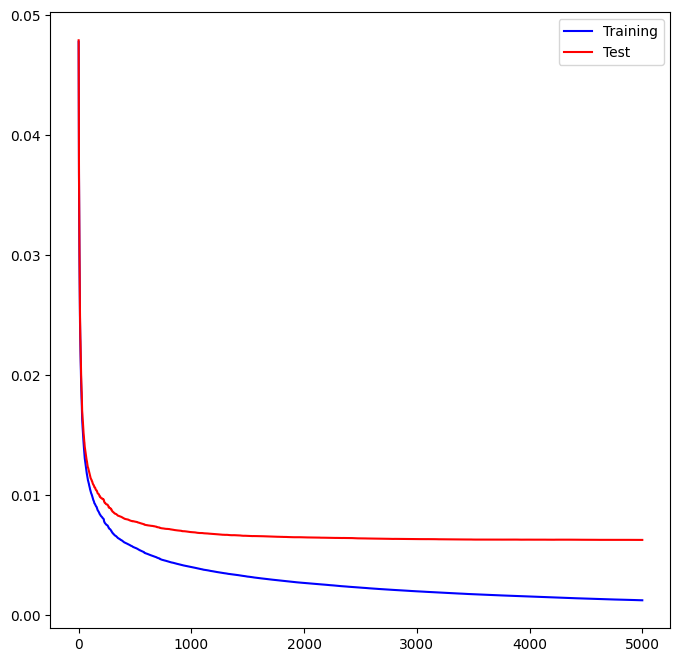

In [284]:
test_error = np.zeros_like(data_boost.train_score_)
for idx, y_ in enumerate(data_boost.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)
plot_idx = np.arange(data_boost.train_score_.shape[0]) 
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,data_boost.train_score_, 'b',label='Training')
ax.plot(plot_idx, test_error ,'r',label='Test') 
ax.legend();

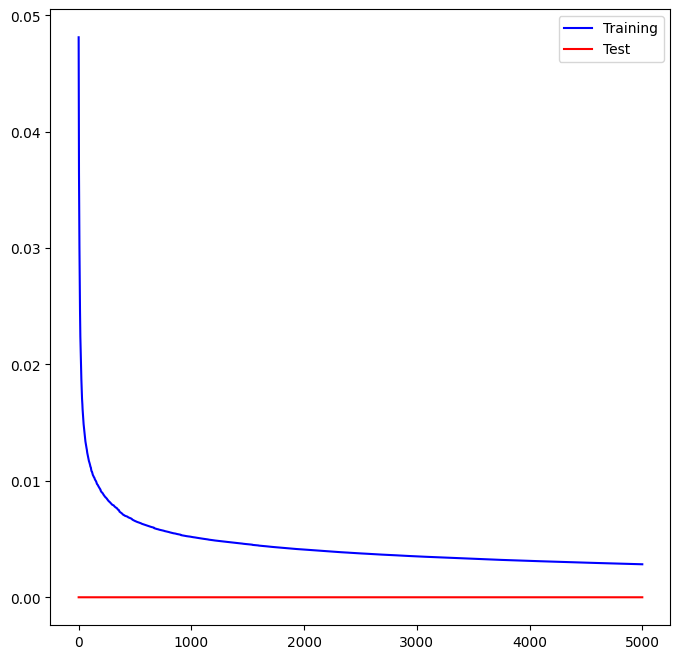

In [294]:
test_errorL = np.zeros_like(data_boostL.train_score_)
for idx, y_ in enumerate(data_boostL.staged_predict(X_testL)):
    test_error[idx] = np.mean((y_testL - y_)**2)
plot_idx = np.arange(data_boostL.train_score_.shape[0]) 
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,data_boostL.train_score_, 'b',label='Training')
ax.plot(plot_idx, test_errorL ,'r',label='Test') 
ax.legend();

Text(0, 0.5, 'Log Predicted Car Prices')

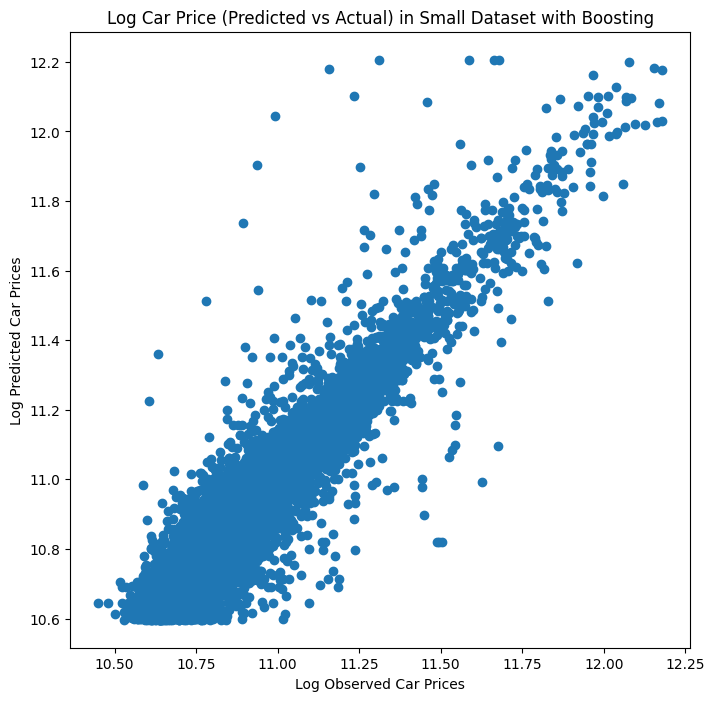

In [285]:
ax = subplots(figsize=(8,8))[1] 
y_hat_boost = data_boost.predict(X_test) 
ax.scatter(y_hat_boost, y_test) 
np.mean((y_test - y_hat_boost)**2)
ax.title.set_text('Log Car Price (Predicted vs Actual) in Small Dataset with Boosting')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

Text(0, 0.5, 'Log Predicted Car Prices')

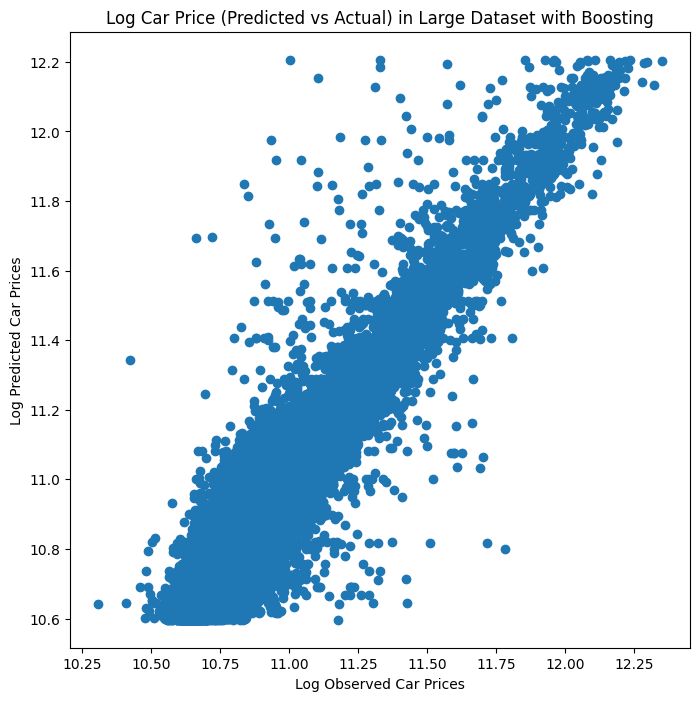

In [299]:
ax = subplots(figsize=(8,8))[1] 
y_hat_boostL = data_boostL.predict(X_testL) 
ax.scatter(y_hat_boostL, y_testL) 
ax.title.set_text('Log Car Price (Predicted vs Actual) in Large Dataset with Boosting')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

In [300]:
mse = mean_squared_error(y_test, y_hat_boost)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_hat_boost)
print(f'R^2: {r2}')


Mean Squared Error: 0.006260442587101147
R^2: 0.886992238846369


In [301]:

mse = mean_squared_error(y_testL, y_hat_boostL)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_testL, y_hat_boostL)
print(f'R^2: {r2}')

Mean Squared Error: 0.004520770559442719
R^2: 0.9185029469800498


## XGBoost

In [287]:
# Convert the data to DMatrix format, which is used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
'objective': 'reg:squarederror',
'eval_metric': 'rmse',
'eta': 0.1, # lr
'max_depth': 9, # depth
'subsample': 0.3,
'colsample_bytree': 0.3
}
# train
num_round = 150
model = xgb.train(params, dtrain, num_round)
# predict
y_train_xgb = model.predict(dtrain)
y_hat_xgb = model.predict(dtest)


# calculate mse
mse = mean_squared_error(y_test, y_hat_xgb)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_hat_xgb)
print(f'R^2: {r2}')

Mean Squared Error: 0.007883108176650923
R^2: 0.8577013695787752


In [302]:
# Large model
dtrainL = xgb.DMatrix(X_trainL, label=y_trainL)
dtestL = xgb.DMatrix(X_testL, label=y_testL)
modelL = xgb.train(params, dtrainL, num_round)
# predict
y_train_xgbL = modelL.predict(dtrainL)
y_hat_xgbL = modelL.predict(dtestL)


# calculate mse
mse = mean_squared_error(y_testL, y_hat_xgbL)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_testL, y_hat_xgbL)
print(f'R^2: {r2}')

Mean Squared Error: 0.005807692612320227
R^2: 0.8953032836932603


Text(0, 0.5, 'Log Predicted Car Prices')

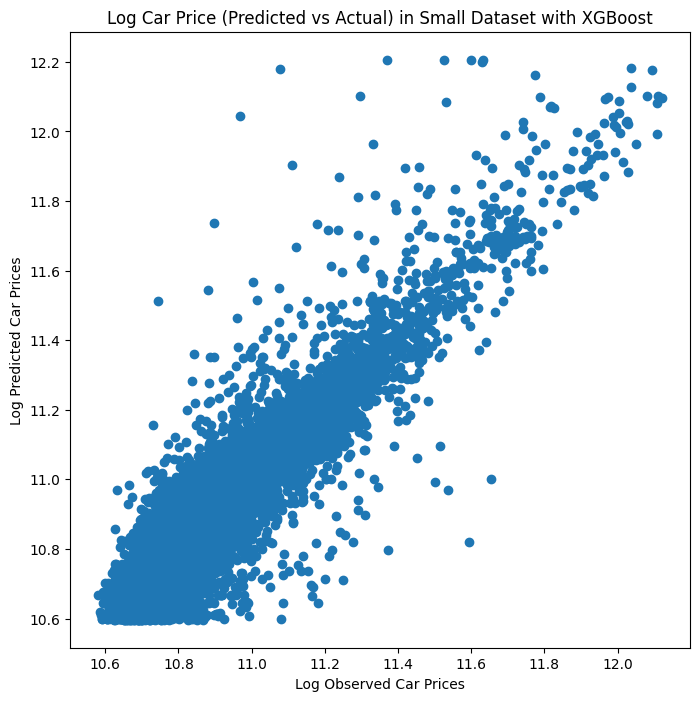

In [288]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(y_hat_xgb, y_test) 
np.mean((y_test - y_hat_xgb)**2)
ax.title.set_text('Log Car Price (Predicted vs Actual) in Small Dataset with XGBoost')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

Text(0, 0.5, 'Log Predicted Car Prices')

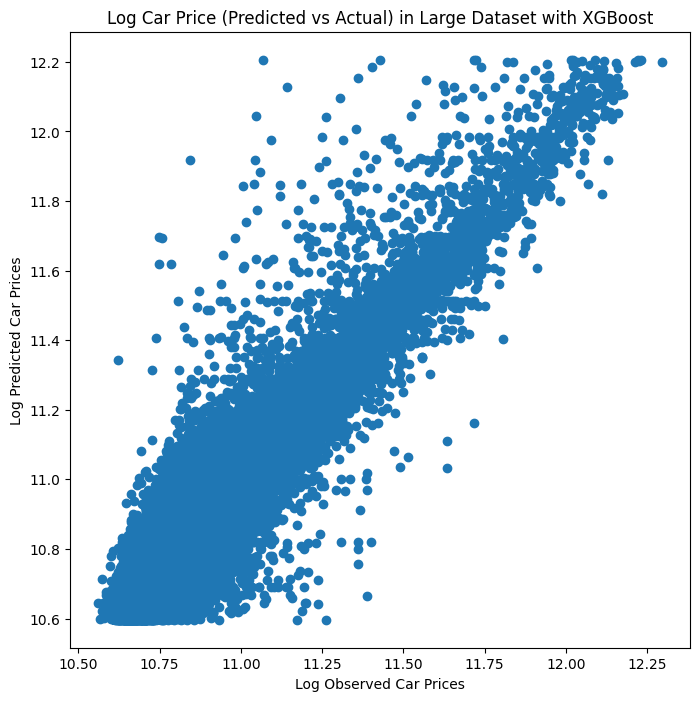

In [304]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(y_hat_xgbL, y_testL) 
np.mean((y_testL - y_hat_xgbL)**2)
ax.title.set_text('Log Car Price (Predicted vs Actual) in Large Dataset with XGBoost')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")

# Create log charts for each model

In [305]:
# choose best one
bestModel = data_bag
bestModelL = data_bagL

# Make Predictions

In [308]:
# Preprocess prediction data
# Read in Data
dataPred = pd.read_csv("./Econ424_F2023_PC5_test_data_without_response_var.csv")
print(dataPred.head())

dataPred.drop(['is_certified','vehicle_damage_category', 'combine_fuel_economy','wheel_system_display','fleet','is_cpo', 'is_oemcpo','bed','bed_height','bed_length','cabin','iscab','transmission_display','engine_cylinders','listed_date'], errors='ignore',
  axis='columns', inplace=True)
dataPred.shape

weirdCols = ["back_legroom", "front_legroom", "height", "length", "wheelbase", "width", "maximum_seating", "fuel_tank_volume"]
# Iterate through the columns and extract float components for matching columns
for column in weirdCols:
    if len(dataPred[column].unique()) >= 4 and dataPred[column].dtype == object:
        print(column)
        for i in range(len(dataPred[column])):
                if pd.isna(dataPred[column][i]):
                    continue
                elif isinstance(dataPred[column][i], str):
                    # print("found string")
                   
                    if len(dataPred[column][i]) <= 2:
                        continue
                    end = dataPred[column][i][-3:]
                    if end == " in":
                        dataPred[column][i] = float(dataPred[column][i][:-3])
                        continue
                    if len(dataPred[column][i]) <= 3:
                        continue
                    end = dataPred[column][i][-4:]
                    if end == " gal":
                        dataPred[column][i] = float(dataPred[column][i][:-4])
                        continue
                    
                    if len(dataPred[column][i]) <= 5:
                        continue
                    end = dataPred[column][i][-6:]
                    if end == " seats":
                        dataPred[column][i] = int(dataPred[column][i][:-6])
                        

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2982051034.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataPred = pd.read_csv("./Econ424_F2023_PC5_test_data_without_response_var.csv")
/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2982051034.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = float(dataPred[column][i][:-3])


   price back_legroom  bed bed_height bed_length        body_type cabin  \
0    NaN        39 in  NaN        NaN        NaN  SUV / Crossover   NaN   
1    NaN      39.1 in  NaN        NaN        NaN  SUV / Crossover   NaN   
2    NaN          NaN  NaN        NaN        NaN  SUV / Crossover   NaN   
3    NaN        39 in  NaN        NaN        NaN  SUV / Crossover   NaN   
4    NaN           --  NaN        NaN        NaN            Sedan   NaN   

             city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0   Oklahoma City               18.0                   NaN  ...             A   
1  Pembroke Pines               18.0                   NaN  ...             A   
2         Ventura                NaN                   NaN  ...             A   
3         Oakdale               18.0                   NaN  ...             A   
4    Jacksonville                NaN                   NaN  ...             A   

  transmission_display  trimid           trim_name vehicle_dam

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2982051034.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = int(dataPred[column][i][:-6])


fuel_tank_volume


/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_13505/2982051034.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = float(dataPred[column][i][:-4])


In [309]:
# Replace all with mean and mode
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']

for col in dataPred.columns:
    if col in categorical_columns or col in bool_columns:
        # calculate mode
        average = "-1"
        # Replace "--" with NaN
        dataPred[col] = dataPred[col].replace(np.nan, "--")
        dataPred[col] = dataPred[col].replace("--", pd.NA)
        # Calculate the mode of the valid string values
        mode_value = dataPred[col].mode(dropna=True).iloc[0]

        # Replace NaN with the mode
        dataPred[col].fillna(mode_value,inplace=True)
        
    elif col != "listed_date":
        # calculate mean
        # Convert non-numeric values ("--") to NaN
        dataPred[col] = pd.to_numeric(dataPred[col], errors="coerce")

        # Calculate the mean of the valid numeric values
        mean_value = dataPred[col].dropna().mean()

        # Replace NaN and "--" with the mean
        dataPred[col].fillna(mean_value, inplace=True)

In [310]:
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']


label_encoder = LabelEncoder()
for category in categorical_columns:
    print("Doing it for category: " + category)
    dataPred[category] = dataPred[category].astype(str)
    print(all)

    dataPred[category] = label_encoder.fit_transform(dataPred[category])
for category in bool_columns:
    print("Doing it for category: " + category)
    dataPred[category] = dataPred[category].astype(str)
    print(all)

    dataPred[category] = label_encoder.fit_transform(dataPred[category])

missing = dataPred.isna().sum()

for x in range(len(missing)):
    print(str(dataPred.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])

Doing it for category: trimid
<built-in function all>
Doing it for category: body_type
<built-in function all>
Doing it for category: city
<built-in function all>
Doing it for category: dealer_zip
<built-in function all>
Doing it for category: engine_type
<built-in function all>
Doing it for category: exterior_color
<built-in function all>
Doing it for category: franchise_make
<built-in function all>
Doing it for category: fuel_type
<built-in function all>
Doing it for category: horsepower
<built-in function all>
Doing it for category: interior_color
<built-in function all>
Doing it for category: listing_color
<built-in function all>
Doing it for category: major_options
<built-in function all>
Doing it for category: make_name
<built-in function all>
Doing it for category: model_name
<built-in function all>
Doing it for category: power
<built-in function all>
Doing it for category: sp_name
<built-in function all>
Doing it for category: torque
<built-in function all>
Doing it for categor

In [314]:
dataPred.drop(columns=['price'],inplace=True)

In [315]:
# apply prediction
Y_test = bestModel.predict(dataPred)
Y_testL = bestModelL.predict(dataPred)

In [317]:
print(len(Y_test))
print(len(Y_testL))

100000
100000


In [318]:
# output to csv file
csv_file_out = "./output.csv"

# Save the DataFrame to a CSV file
np.savetxt(csv_file_out, Y_test, delimiter="\n", fmt="%1.6f")

In [319]:
# output to csv file
csv_file_outL = "./outputL.csv"

# Save the DataFrame to a CSV file
np.savetxt(csv_file_outL, Y_testL, delimiter="\n", fmt="%1.6f")

# Plot of Sales Price vs Mileage

In [133]:
data.shape

(43706, 49)

<Figure size 2000x2000 with 0 Axes>

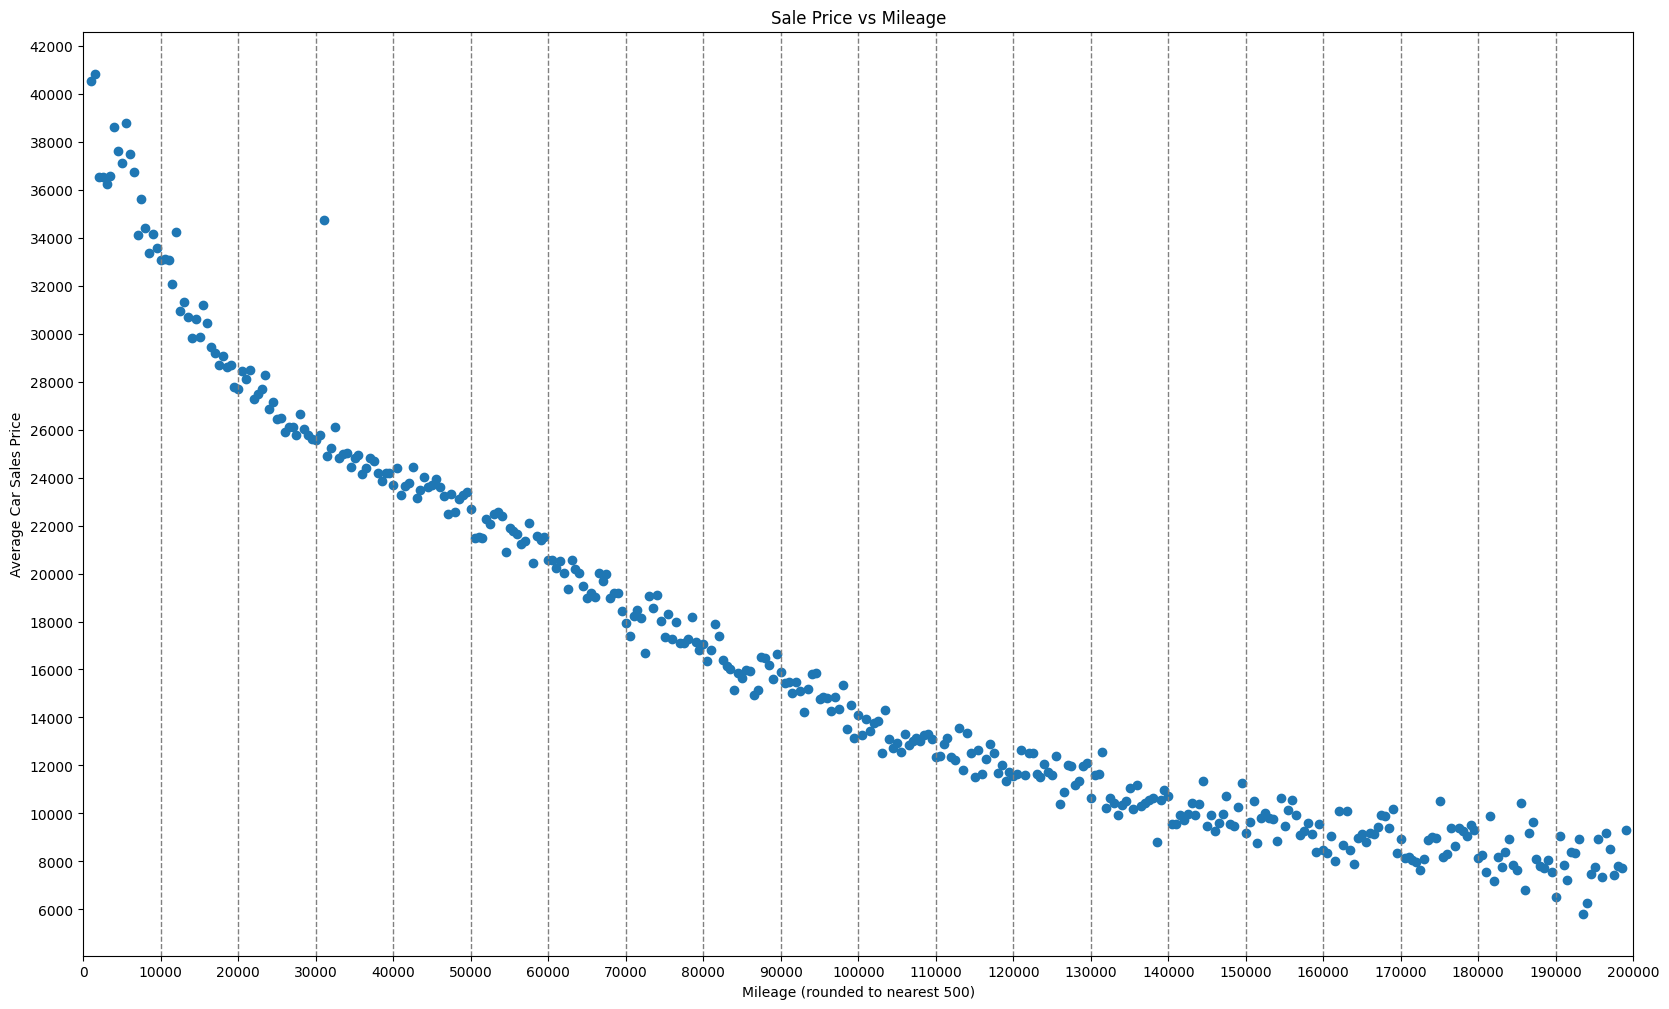

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Create a new DataFrame with average prices for each mileage bin
max_mileage = 200000
mileage_bins = range(1000, max_mileage, 500)

# Calculate bins and average prices
df['mileage_bins'] = pd.cut(df['mileage'], bins=mileage_bins, right=False)
avg_prices = df.groupby('mileage_bins')['price'].mean().reset_index()    
    
# Set the size of the plot
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

fig, ax = plt.subplots(figsize=(20,12))

# Plot the average prices for each mileage bin
ax.scatter(mileage_bins[:-1], avg_prices['price'])

# Set the y-axis ticks to go up by 2000
ax.set_xticks(np.arange(0, max_mileage+10000, 10000))
ax.set_yticks(np.arange(6000, max(avg_prices['price']) + 2000, 2000))

# Label the axes
ax.set_xlabel('Mileage (rounded to nearest 500)')
ax.set_ylabel('Average Car Sales Price')
ax.set_title('Sale Price vs Mileage')
ax.set_xlim(0,max_mileage)

# # Add vertical lines at each 10,000-mile mark
for mile_mark in range(10000, max_mileage, 10000):
    ax.axvline(x=mile_mark, color='gray', linestyle='--', linewidth=1)

